In [1]:
import numpy as np
#9888247154
#manali@sunparkresortS.com
np.seterr(over='ignore')
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

import matplotlib.pyplot as plt
w = 10
h = 10
fig = plt.figure(figsize=(8,8))
columns = 10
rows = 10

Using TensorFlow backend.


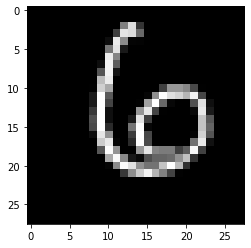

In [2]:
for i in range(1, columns*rows + 1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')

In [4]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [7]:
# Changing dimensions to N * D = 28x28
# Number of samples you want in training data. 60,000 is max
N = 50000
X_tr = []
for i in range(N):
    X_tr.append(X_train[i, :].flatten())
X_te = []
for i in range(10000):
    X_te.append(X_test[i, :].flatten())

In [9]:
print(len(X_tr), len(X_tr[0]))
print(len(X_te), len(X_te[0]))

50000 784
10000 784


In [33]:
class NN:
    def __init__(self):
        pass
    
    # Memorize the training set.
    def train(self, X, y):
        # X is 2D if size N x D = 28x28, so each row is an example
        # y is 1D of size N
        self.tr_X = X
        self.tr_y = y

    # For the test image:
    #  find nearest train image with minimum distance from the test image
    #  predict the label of nearest training image
    def predict(self, X):
        # x is of size D = 28x28 for which we want to predict the label
        # returns the predicted label for the input x
        min_idx = None
        min_dist = 100000000
        for test_sample in range(len(self.tr_X)):
            dist = 0;
            for each_value in range(len(self.tr_X[0])):
                dist += abs(float((self.tr_X[test_sample][each_value] - X[each_value])))
            if dist < min_dist:
                min_dist = dist
                min_idx = test_sample
        return self.tr_y[min_idx]    

In [34]:
classifier = NN()
classifier.train(X_tr, y_train)

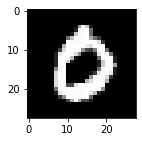

0


In [35]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[3],cmap="gray")
plt.show()
print(classifier.predict(X_te[3]))

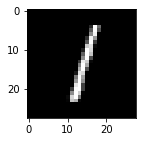

1


In [38]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[2],cmap="gray")
plt.show()
print(classifier.predict(X_te[2]))

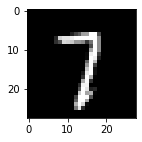

7


In [53]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[234], cmap="gray")
plt.show()
print(classifier.predict(X_te[234]))